In [ ]:
# Install necessary libraries
!pip install pandas openpyxl matplotlib seaborn

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')

In [ ]:
# Upload the dataset
print("Please upload the Excel file.")
uploaded = files.upload()

Please upload the Excel file.


Saving BBA DBE Data Analyst - Assignment (1).xlsx to BBA DBE Data Analyst - Assignment (1).xlsx


In [ ]:
# Load the dataset
df = pd.read_excel(list(uploaded.keys())[0])

In [ ]:
# Dataset Overview
print("Dataset Shape:", df.shape)
print("\
First few rows of the dataset:")
print(df.head())

Dataset Shape: (4943, 25)
First few rows of the dataset:
   order_id_new  order_try_id_new        calc_created  metered_price  \
0            22                22 2020-02-02 03:37:31           4.04   
1           618               618 2020-02-08 02:26:19           6.09   
2           657               657 2020-02-08 11:50:35           4.32   
3           313               313 2020-02-05 06:34:54       72871.72   
4          1176              1176 2020-02-13 17:31:24       20032.50   

   upfront_price  distance  duration  gps_confidence entered_by   b_state  \
0           10.0      2839       700               1     client  finished   
1            3.6      5698       493               1     client  finished   
2            3.5      4426       695               1     client  finished   
3            NaN     49748      1400               0     client  finished   
4        19500.0     10273      5067               1     client  finished   

   ...  ticket_id_new rider_app_version  order_

In [ ]:
# Display data info and missing values
print("\
Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id_new           4943 non-null   int64         
 1   order_try_id_new       4943 non-null   int64         
 2   calc_created           4943 non-null   datetime64[ns]
 3   metered_price          4923 non-null   float64       
 4   upfront_price          3409 non-null   float64       
 5   distance               4943 non-null   int64         
 6   duration               4943 non-null   int64         
 7   gps_confidence         4943 non-null   int64         
 8   entered_by             4943 non-null   object        
 9   b_state                4943 non-null   object        
 10  dest_change_number     4943 non-null   int64         
 11  prediction_price_type  4923 non-null   object        
 12  predicted_distance     4923 non-null   float64  

In [ ]:
print("\
Missing Values Count:")
print(df.isnull().sum())

Missing Values Count:
order_id_new                0
order_try_id_new            0
calc_created                0
metered_price              20
upfront_price            1534
distance                    0
duration                    0
gps_confidence              0
entered_by                  0
b_state                     0
dest_change_number          0
prediction_price_type      20
predicted_distance         20
predicted_duration         20
change_reason_pricing    4645
ticket_id_new               0
rider_app_version          16
order_state                 0
order_try_state             0
driver_app_version          0
driver_device_uid_new       0
device_name                 0
us_indicator                0
overpaid_ride_ticket        0
fraud_score              2759
dtype: int64


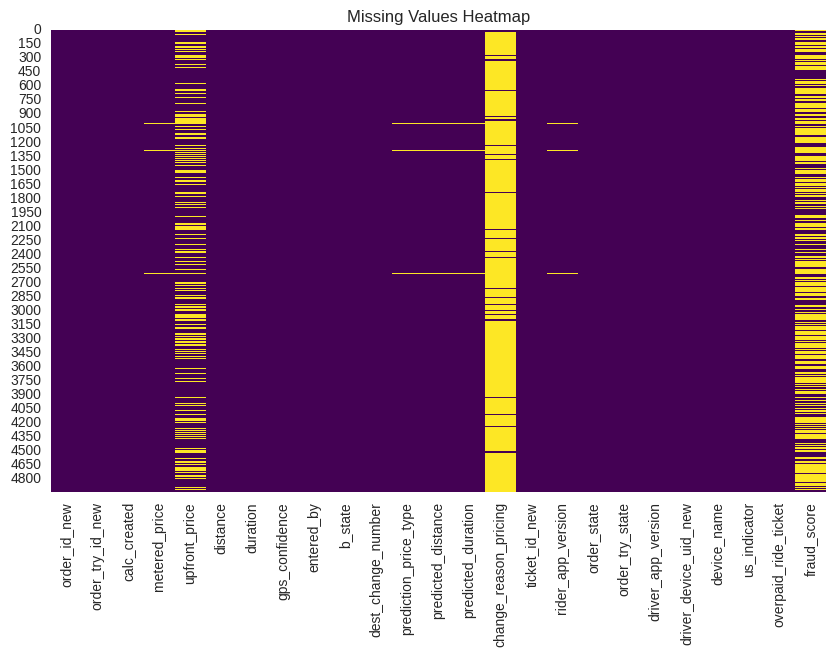

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Calculate price differences and their percentage
df['price_difference'] = df['metered_price'] - df['upfront_price']
df['price_difference_percentage'] = (df['price_difference'] / df['upfront_price']) * 100


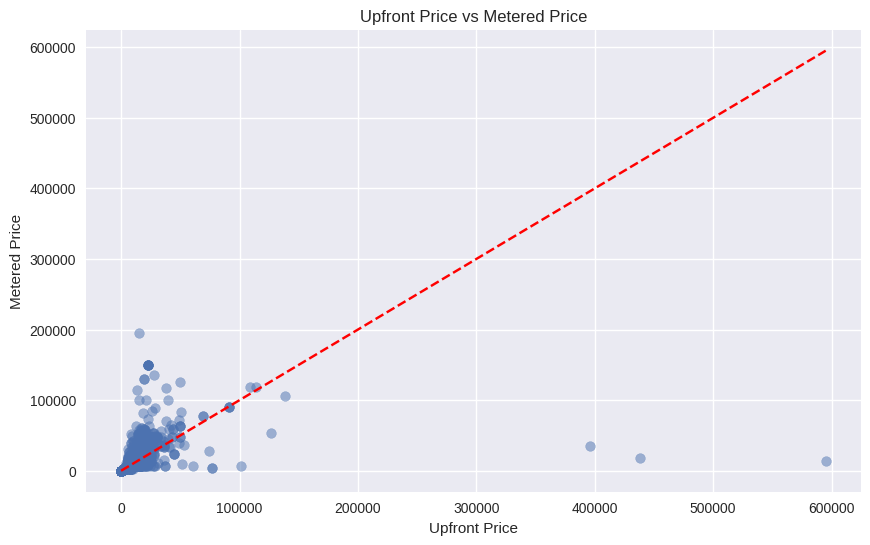

In [ ]:
# Scatter plot: Upfront Price vs Metered Price
plt.figure(figsize=(10, 6))
plt.scatter(df['upfront_price'], df['metered_price'], alpha=0.5)
plt.plot([0, df['upfront_price'].max()], [0, df['upfront_price'].max()], 'r--')  # Perfect prediction line
plt.xlabel('Upfront Price')
plt.ylabel('Metered Price')
plt.title('Upfront Price vs Metered Price')
plt.show()

In [ ]:
# Calculate percentage of rides with >20% deviation
deviation_threshold = 20
high_deviation = df[abs(df['price_difference_percentage']) > deviation_threshold]
deviation_percentage = (len(high_deviation) / len(df)) * 100


In [ ]:
print(f"\
Percentage of rides with >20% price deviation: {deviation_percentage:.2f}%")

Percentage of rides with >20% price deviation: 31.62%


In [ ]:
# Basic statistics of price differences
print("\
Price Difference Statistics:")
print(df['price_difference'].describe())

Price Difference Statistics:
count      3409.000000
mean        839.204362
std       17010.080750
min     -581317.540000
25%          -0.300000
50%           0.300000
75%           2.120000
max      178983.520000
Name: price_difference, dtype: float64


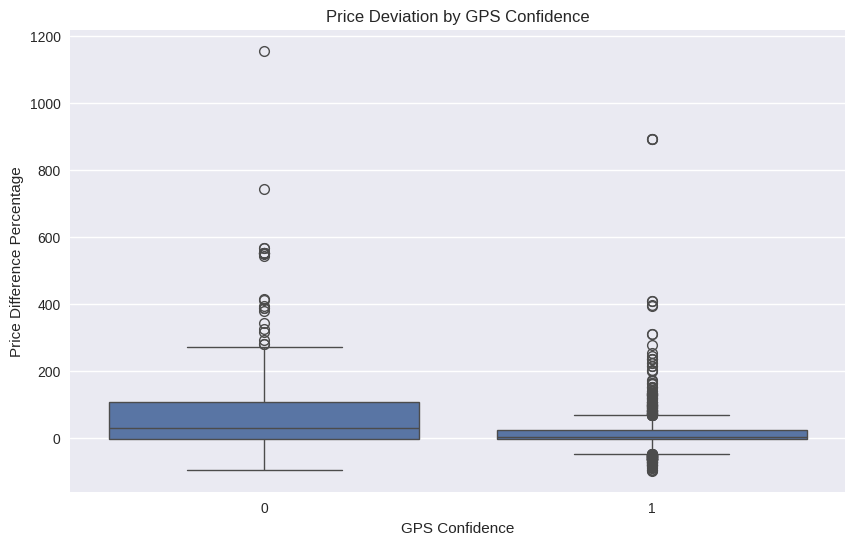

In [ ]:
# Investigate factors contributing to price deviations
# Analyze deviation by GPS confidence
plt.figure(figsize=(10, 6))
sns.boxplot(x='gps_confidence', y='price_difference_percentage', data=df)
plt.title('Price Deviation by GPS Confidence')
plt.xlabel('GPS Confidence')
plt.ylabel('Price Difference Percentage')
plt.show()

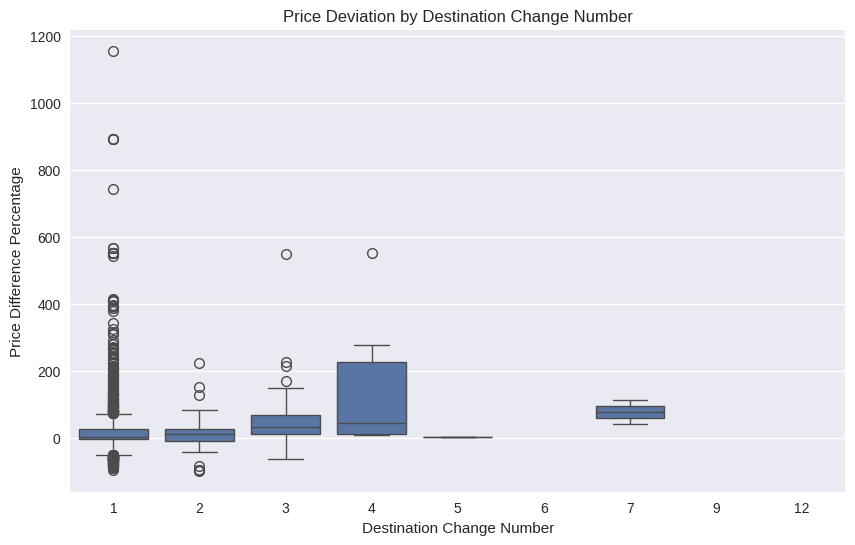

In [ ]:
# Analyze deviation by destination change number
plt.figure(figsize=(10, 6))
sns.boxplot(x='dest_change_number', y='price_difference_percentage', data=df)
plt.title('Price Deviation by Destination Change Number')
plt.xlabel('Destination Change Number')
plt.ylabel('Price Difference Percentage')
plt.show()


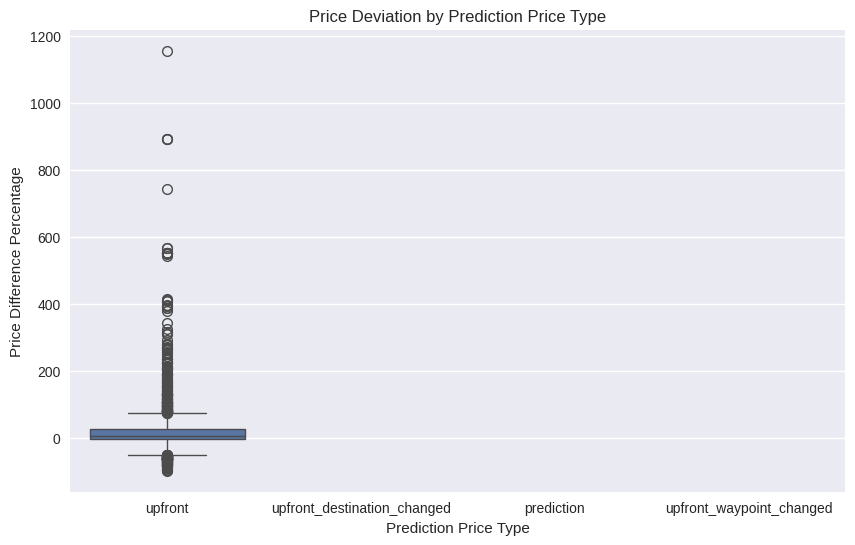

In [ ]:
# Analyze deviation by prediction price type
plt.figure(figsize=(10, 6))
sns.boxplot(x='prediction_price_type', y='price_difference_percentage', data=df)
plt.title('Price Deviation by Prediction Price Type')
plt.xlabel('Prediction Price Type')
plt.ylabel('Price Difference Percentage')
plt.show()

In [ ]:
# Summarize key factors affecting price accuracy
# Group by GPS confidence and calculate mean price deviation percentage
gps_confidence_summary = df.groupby('gps_confidence')['price_difference_percentage'].mean().reset_index()
print("\
Mean Price Deviation Percentage by GPS Confidence:")
print(gps_confidence_summary)

Mean Price Deviation Percentage by GPS Confidence:
   gps_confidence  price_difference_percentage
0               0                    73.929239
1               1                    11.879938


In [ ]:
# Group by destination change number and calculate mean price deviation percentage
dest_change_summary = df.groupby('dest_change_number')['price_difference_percentage'].mean().reset_index()
print("\
Mean Price Deviation Percentage by Destination Change Number:")
print(dest_change_summary)

Mean Price Deviation Percentage by Destination Change Number:
   dest_change_number  price_difference_percentage
0                   1                    17.857760
1                   2                    13.021703
2                   3                    56.166069
3                   4                   156.289365
4                   5                     2.790805
5                   6                          NaN
6                   7                    78.221525
7                   9                          NaN
8                  12                          NaN


In [ ]:
# Group by prediction price type and calculate mean price deviation percentage
prediction_type_summary = df.groupby('prediction_price_type')['price_difference_percentage'].mean().reset_index()
print("\
Mean Price Deviation Percentage by Prediction Price Type:")
print(prediction_type_summary)

Mean Price Deviation Percentage by Prediction Price Type:
         prediction_price_type  price_difference_percentage
0                   prediction                          NaN
1                      upfront                    18.650939
2  upfront_destination_changed                          NaN
3     upfront_waypoint_changed                          NaN


In [ ]:
# Data Quality Check
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\
Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [ ]:
# Check for missing values again
missing_values = df.isnull().sum()
print("\
Missing Values Count:")
print(missing_values)

Missing Values Count:
order_id_new                      0
order_try_id_new                  0
calc_created                      0
metered_price                    20
upfront_price                  1534
distance                          0
duration                          0
gps_confidence                    0
entered_by                        0
b_state                           0
dest_change_number                0
prediction_price_type            20
predicted_distance               20
predicted_duration               20
change_reason_pricing          4645
ticket_id_new                     0
rider_app_version                16
order_state                       0
order_try_state                   0
driver_app_version                0
driver_device_uid_new             0
device_name                       0
us_indicator                      0
overpaid_ride_ticket              0
fraud_score                    2759
price_difference               1534
price_difference_percentage    1534
dtype:

In [ ]:
# Address missing values by imputing or dropping rows/columns with significant missing data
# Drop rows where 'upfront_price' or 'metered_price' is missing, as these are critical for analysis
df_cleaned = df.dropna(subset=['upfront_price', 'metered_price'])

In [ ]:
# Impute missing values in 'price_difference_percentage' with the mean of the column
df_cleaned['price_difference_percentage'].fillna(df_cleaned['price_difference_percentage'].mean(), inplace=True)


<ipython-input-24-5fc8f6757015>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['price_difference_percentage'].fillna(df_cleaned['price_difference_percentage'].mean(), inplace=True)
<ipython-input-24-5fc8f6757015>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price_difference_percentage'].fillna(df_cleaned['price_dif

In [ ]:
# Verify the cleaned dataset
print("\
Cleaned Dataset Shape:", df_cleaned.shape)
print("\
Missing Values Count After Cleaning:")
print(df_cleaned.isnull().sum())

Cleaned Dataset Shape: (3409, 27)
Missing Values Count After Cleaning:
order_id_new                      0
order_try_id_new                  0
calc_created                      0
metered_price                     0
upfront_price                     0
distance                          0
duration                          0
gps_confidence                    0
entered_by                        0
b_state                           0
dest_change_number                0
prediction_price_type             0
predicted_distance                0
predicted_duration                0
change_reason_pricing          3377
ticket_id_new                     0
rider_app_version                 0
order_state                       0
order_try_state                   0
driver_app_version                0
driver_device_uid_new             0
device_name                       0
us_indicator                      0
overpaid_ride_ticket              0
fraud_score                    1439
price_difference             

In [ ]:
# Save the cleaned dataset for further analysis
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
print("\
Cleaned dataset saved as 'cleaned_dataset.csv'.")

Cleaned dataset saved as 'cleaned_dataset.csv'.


In [ ]:
# Here I am modifying my approach to focus on numerical columns only
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_cleaned[numerical_columns].corr()

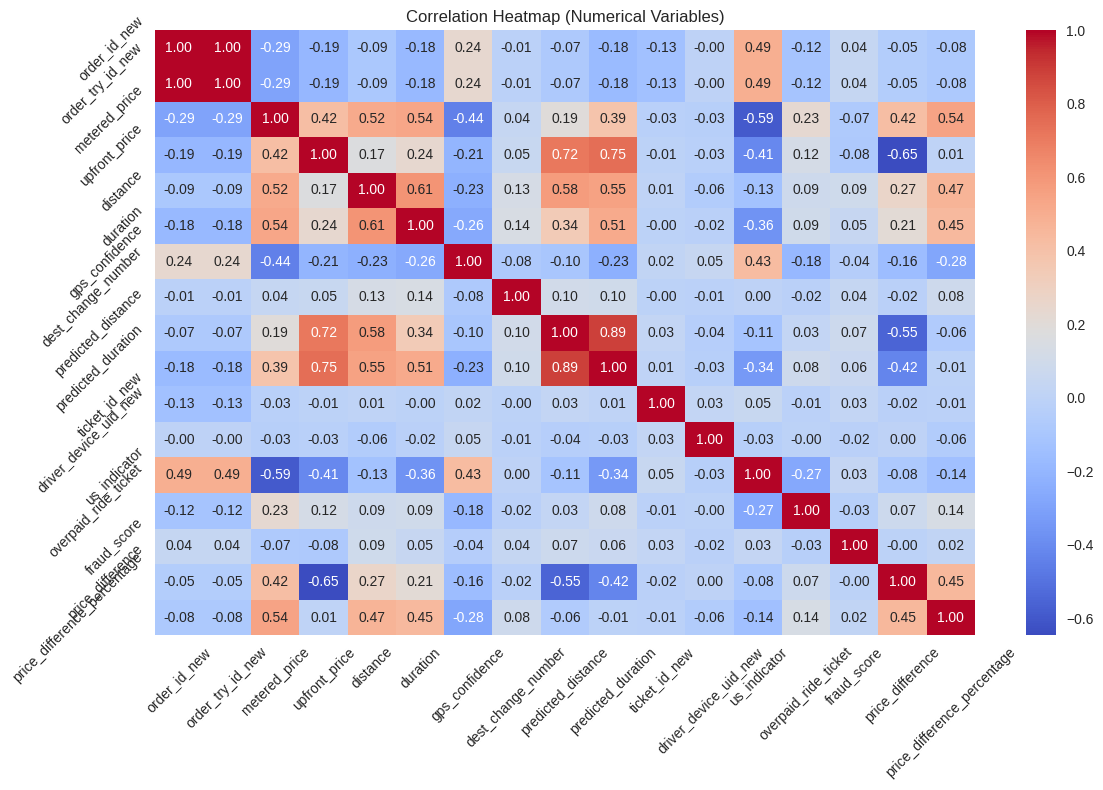

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap (Numerical Variables)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate summary statistics for key metrics
print("\
Key Metrics Summary:")
metrics_summary = df_cleaned[['metered_price', 'upfront_price', 'distance', 'duration', 'predicted_distance', 'predicted_duration']].describe()
print(metrics_summary)


Key Metrics Summary:
       metered_price  upfront_price       distance      duration  \
count    3409.000000    3409.000000    3409.000000   3409.000000   
mean     4999.300109    4160.095747    8971.718979   1245.337342   
std     14306.060449   17015.711912    9882.407374   1311.288049   
min         2.000000       2.000000       0.000000      0.000000   
25%         4.460000       4.200000    3629.000000    537.000000   
50%         7.370000       6.600000    6549.000000    895.000000   
75%      2033.300000    4000.000000   11203.000000   1447.000000   
max    194483.520000  595000.000000  171119.000000  18734.000000   

       predicted_distance  predicted_duration  
count         3409.000000         3409.000000  
mean          8436.150191         1007.584042  
std          10972.320329          802.115433  
min             21.000000            2.000000  
25%           3873.000000          552.000000  
50%           6365.000000          839.000000  
75%          10306.000000     

In [ ]:
# Calculate accuracy metrics
df_cleaned['distance_accuracy'] = abs(df_cleaned['predicted_distance'] - df_cleaned['distance']) / df_cleaned['distance'] * 100
df_cleaned['duration_accuracy'] = abs(df_cleaned['predicted_duration'] - df_cleaned['duration']) / df_cleaned['duration'] * 100


<ipython-input-30-92d28f618e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['distance_accuracy'] = abs(df_cleaned['predicted_distance'] - df_cleaned['distance']) / df_cleaned['distance'] * 100
<ipython-input-30-92d28f618e6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['duration_accuracy'] = abs(df_cleaned['predicted_duration'] - df_cleaned['duration']) / df_cleaned['duration'] * 100


In [ ]:
print("\
Prediction Accuracy Metrics:")
print("\
Distance Prediction Error (%):")
print(df_cleaned['distance_accuracy'].describe())
print("\
Duration Prediction Error (%):")
print(df_cleaned['duration_accuracy'].describe())

Prediction Accuracy Metrics:
Distance Prediction Error (%):
count    3409.000000
mean             inf
std              NaN
min         0.000000
25%         3.657827
50%        15.207117
75%        36.027230
max              inf
Name: distance_accuracy, dtype: float64
Duration Prediction Error (%):
count    3409.000000
mean             inf
std              NaN
min         0.000000
25%         9.677419
50%        22.950820
75%        43.371378
max              inf
Name: duration_accuracy, dtype: float64


In [ ]:
# Analyze trends over time and identify outliers
# Convert 'calc_created' to datetime for time-based analysis
df_cleaned['calc_created'] = pd.to_datetime(df_cleaned['calc_created'], unit='ms')


<ipython-input-32-2f0a329fcdc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['calc_created'] = pd.to_datetime(df_cleaned['calc_created'], unit='ms')


In [ ]:
# Extract year and month for trend analysis
df_cleaned['year_month'] = df_cleaned['calc_created'].dt.to_period('M')

<ipython-input-33-cbff025eb95c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year_month'] = df_cleaned['calc_created'].dt.to_period('M')


In [ ]:
# Analyze price deviation trends over time
price_trend = df_cleaned.groupby('year_month')['price_difference_percentage'].mean().reset_index()


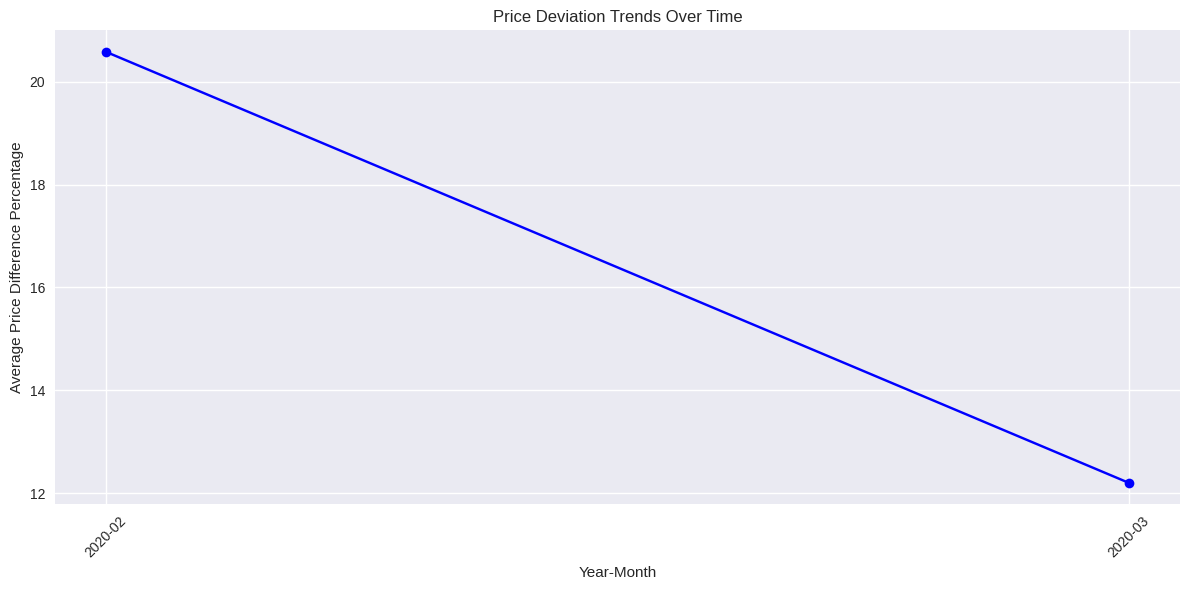

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(price_trend['year_month'].astype(str), price_trend['price_difference_percentage'], marker='o', linestyle='-', color='b')
plt.title('Price Deviation Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Price Difference Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


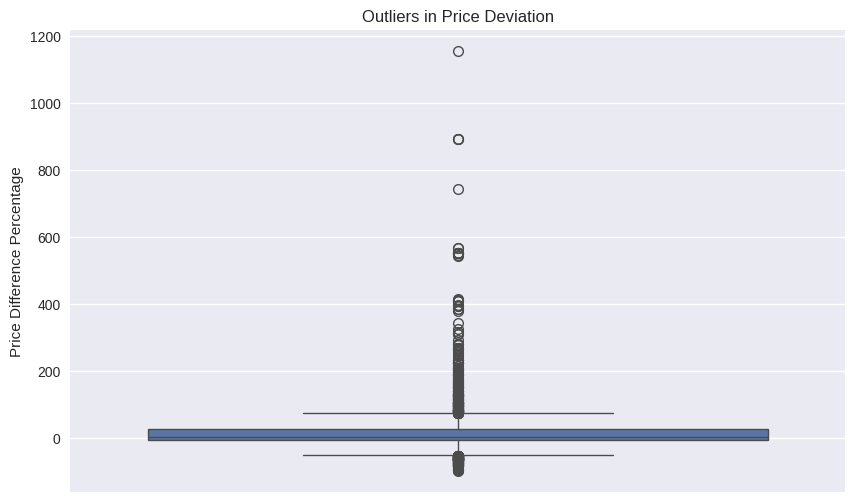

In [ ]:
# Identify outliers in price deviation
plt.figure(figsize=(10, 6))
sns.boxplot(y='price_difference_percentage', data=df_cleaned)
plt.title('Outliers in Price Deviation')
plt.ylabel('Price Difference Percentage')
plt.show()

In [ ]:
# Save the dataset with time-based features for further analysis
df_cleaned.to_csv('cleaned_dataset_with_time_features.csv', index=False)
print("\
Dataset with time-based features saved as 'cleaned_dataset_with_time_features.csv'.")

Dataset with time-based features saved as 'cleaned_dataset_with_time_features.csv'.


In [ ]:
# 1. Price Prediction Accuracy Analysis

# Calculate price difference metrics
df_cleaned['absolute_price_diff'] = abs(df_cleaned['metered_price'] - df_cleaned['upfront_price'])
df_cleaned['price_accuracy'] = (1 - abs(df_cleaned['metered_price'] - df_cleaned['upfront_price'])/df_cleaned['metered_price']) * 100


<ipython-input-38-e294d1a30d9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['absolute_price_diff'] = abs(df_cleaned['metered_price'] - df_cleaned['upfront_price'])
<ipython-input-38-e294d1a30d9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price_accuracy'] = (1 - abs(df_cleaned['metered_price'] - df_cleaned['upfront_price'])/df_cleaned['metered_price']) * 100


In [ ]:
# Overall price prediction accuracy metrics
print("\
Price Prediction Accuracy Statistics:")
print(df_cleaned['price_accuracy'].describe())

Price Prediction Accuracy Statistics:
count    3409.000000
mean       68.903812
std       111.719082
min     -4148.633214
25%        71.054164
50%        84.123223
75%        95.652174
max       100.000000
Name: price_accuracy, dtype: float64


In [ ]:
# Analyze accuracy by GPS confidence
gps_accuracy = df_cleaned.groupby('gps_confidence')['price_accuracy'].agg(['mean', 'count', 'std']).round(2)
print("\
Price Accuracy by GPS Confidence:")
print(gps_accuracy)

Price Accuracy by GPS Confidence:
                 mean  count     std
gps_confidence                      
0               31.79    372  150.46
1               73.45   3037  105.14


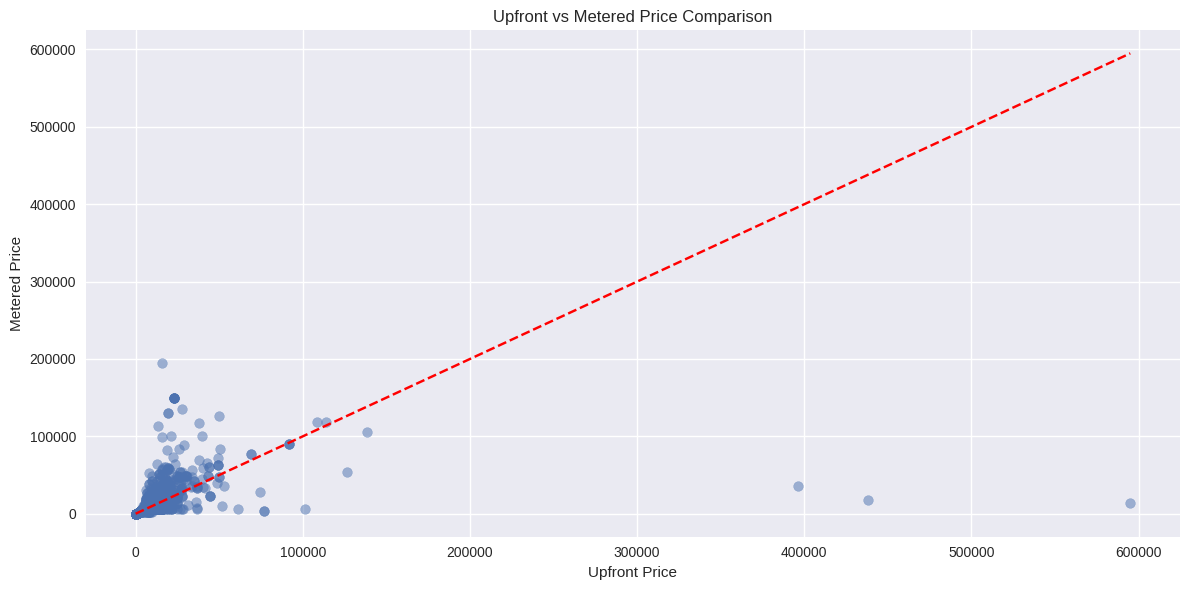

In [ ]:
# Visualize price prediction accuracy
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['upfront_price'], df_cleaned['metered_price'], alpha=0.5)
plt.plot([0, df_cleaned['upfront_price'].max()], [0, df_cleaned['upfront_price'].max()], 'r--')  # Perfect prediction line
plt.xlabel('Upfront Price')
plt.ylabel('Metered Price')
plt.title('Upfront vs Metered Price Comparison')
plt.tight_layout()
plt.show()

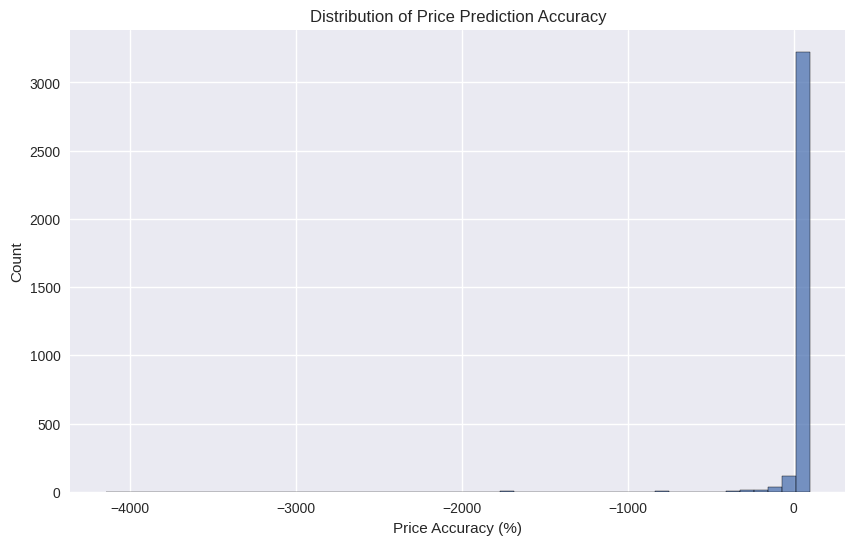

In [ ]:
# Distribution of price differences
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='price_accuracy', bins=50)
plt.title('Distribution of Price Prediction Accuracy')
plt.xlabel('Price Accuracy (%)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate percentage of rides within different accuracy thresholds
accuracy_thresholds = {
    'Within 5%': (df_cleaned['price_accuracy'] >= 95).mean() * 100,
    'Within 10%': (df_cleaned['price_accuracy'] >= 90).mean() * 100,
    'Within 20%': (df_cleaned['price_accuracy'] >= 80).mean() * 100
}

print("\
Percentage of Rides within Accuracy Thresholds:")
for threshold, percentage in accuracy_thresholds.items():
    print(f"{threshold}: {percentage:.2f}%")

Percentage of Rides within Accuracy Thresholds:
Within 5%: 27.19%
Within 10%: 40.92%
Within 20%: 60.19%


In [ ]:
# 2. Route Analysis: Predicted vs Actual Distance and Duration

# Calculate distance and duration prediction errors
df_cleaned['distance_error'] = abs(df_cleaned['predicted_distance'] - df_cleaned['distance'])
df_cleaned['duration_error'] = abs(df_cleaned['predicted_duration'] - df_cleaned['duration'])


<ipython-input-44-5cb0031d7728>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['distance_error'] = abs(df_cleaned['predicted_distance'] - df_cleaned['distance'])
<ipython-input-44-5cb0031d7728>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['duration_error'] = abs(df_cleaned['predicted_duration'] - df_cleaned['duration'])


In [ ]:
# Summary statistics for distance and duration errors
print("\
Distance Prediction Error Statistics:")
print(df_cleaned['distance_error'].describe())

print("\
Duration Prediction Error Statistics:")
print(df_cleaned['duration_error'].describe())

Distance Prediction Error Statistics:
count      3409.000000
mean       2880.565562
std        9196.909312
min           0.000000
25%         229.000000
50%         904.000000
75%        2739.000000
max      341860.000000
Name: distance_error, dtype: float64
Duration Prediction Error Statistics:
count     3409.00000
mean       504.87973
std       1043.20655
min          0.00000
25%         75.00000
50%        189.00000
75%        484.00000
max      20081.00000
Name: duration_error, dtype: float64


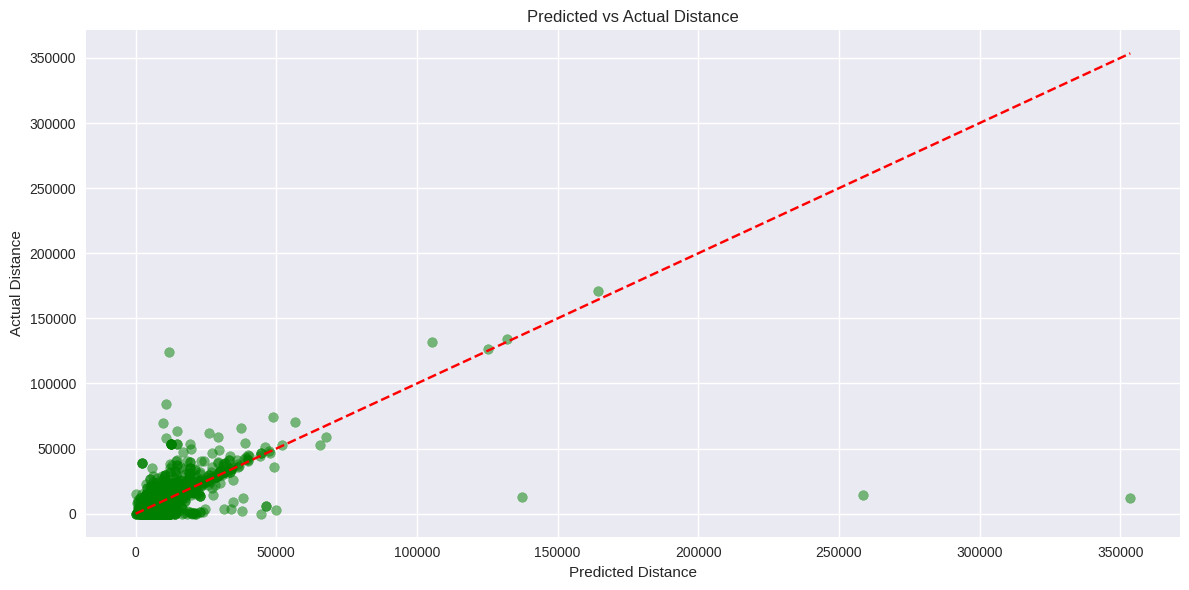

In [ ]:
# Visualize predicted vs actual distances
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['predicted_distance'], df_cleaned['distance'], alpha=0.5, color='g')
plt.plot([0, df_cleaned['predicted_distance'].max()], [0, df_cleaned['predicted_distance'].max()], 'r--')  # Perfect prediction line
plt.xlabel('Predicted Distance')
plt.ylabel('Actual Distance')
plt.title('Predicted vs Actual Distance')
plt.tight_layout()
plt.show()

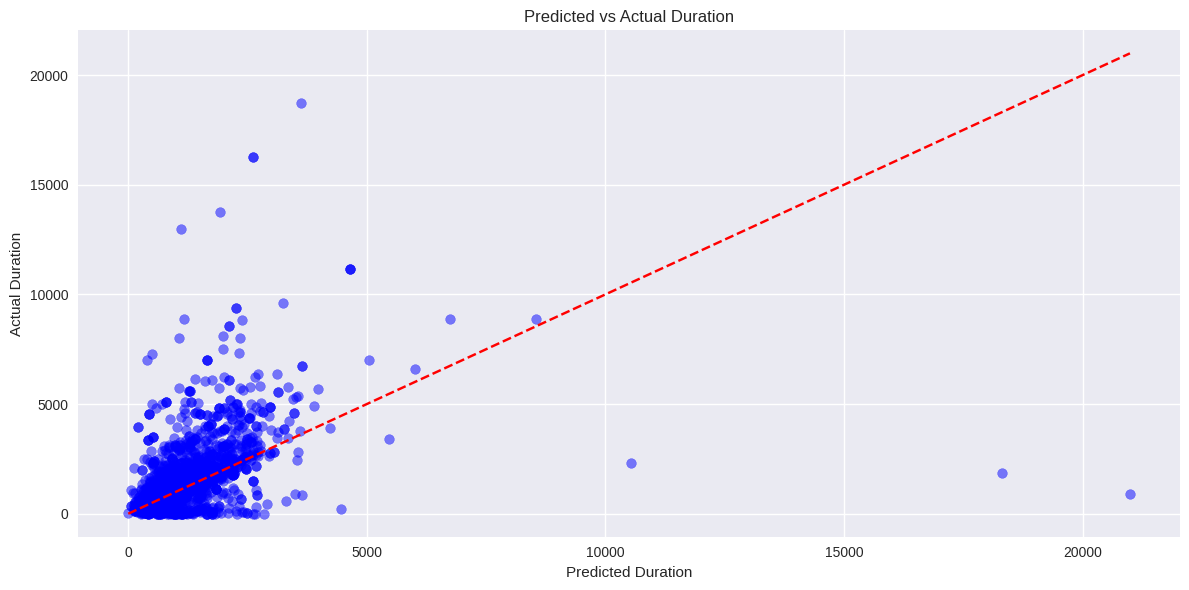

In [ ]:
# Visualize predicted vs actual durations
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['predicted_duration'], df_cleaned['duration'], alpha=0.5, color='b')
plt.plot([0, df_cleaned['predicted_duration'].max()], [0, df_cleaned['predicted_duration'].max()], 'r--')  # Perfect prediction line
plt.xlabel('Predicted Duration')
plt.ylabel('Actual Duration')
plt.title('Predicted vs Actual Duration')
plt.tight_layout()
plt.show()


In [ ]:
# Save dataset with route analysis features
df_cleaned.to_csv('cleaned_dataset_with_route_analysis.csv', index=False)
print("\
Dataset with route analysis features saved as 'cleaned_dataset_with_route_analysis.csv'.")

Dataset with route analysis features saved as 'cleaned_dataset_with_route_analysis.csv'.


In [ ]:
# 3. User Experience Analysis

# Analyze overpaid rides
print("\
Overpaid Rides Analysis:")
overpaid_rides = df_cleaned[df_cleaned['overpaid_ride_ticket'] == 1]
print("Number of Overpaid Rides:", len(overpaid_rides))
print("Percentage of Overpaid Rides:", len(overpaid_rides) / len(df_cleaned) * 100)


Overpaid Rides Analysis:
Number of Overpaid Rides: 108
Percentage of Overpaid Rides: 3.16808448225286


In [ ]:
# Analyze user indicators and their impact on price accuracy
user_indicator_accuracy = df_cleaned.groupby('us_indicator')['price_accuracy'].agg(['mean', 'count', 'std']).round(2)
print("\
Price Accuracy by User Indicator:")
print(user_indicator_accuracy)

Price Accuracy by User Indicator:
               mean  count     std
us_indicator                      
0             41.77    882  204.38
1             78.38   2527   43.86


In [ ]:
# Analyze app versions and their impact on price accuracy
rider_app_accuracy = df_cleaned.groupby('rider_app_version')['price_accuracy'].mean().sort_values(ascending=False).head(10)
print("\
Top 10 Rider App Versions by Price Accuracy:")
print(rider_app_accuracy)

Top 10 Rider App Versions by Price Accuracy:
rider_app_version
CA.4.72    100.000000
CA.4.83     98.929110
CA.5.22     98.888254
CI.3.87     98.284314
CI.3.82     97.796143
CA.4.86     95.000384
CA.4.52     94.128679
CA.4.92     93.617021
CA.4.95     92.637196
CA.5.21     92.177914
Name: price_accuracy, dtype: float64


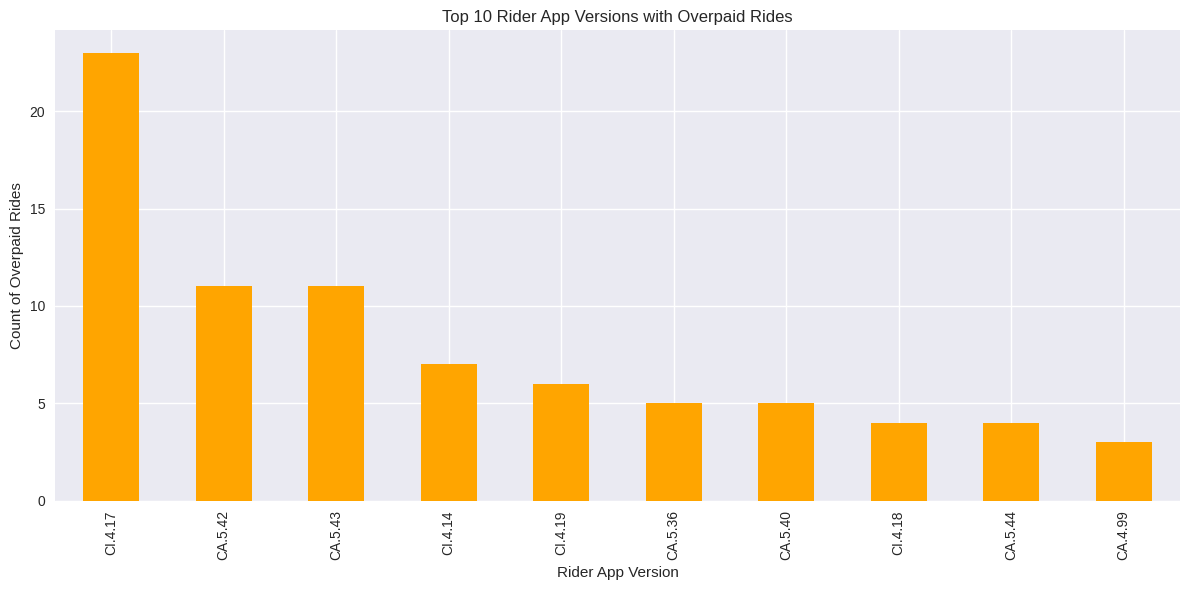

In [ ]:
# Visualize overpaid rides by app version
plt.figure(figsize=(12, 6))
overpaid_rides_by_app = overpaid_rides['rider_app_version'].value_counts().head(10)
overpaid_rides_by_app.plot(kind='bar', color='orange')
plt.title('Top 10 Rider App Versions with Overpaid Rides')
plt.xlabel('Rider App Version')
plt.ylabel('Count of Overpaid Rides')
plt.tight_layout()
plt.show()

In [ ]:
# Save dataset with user experience features
df_cleaned.to_csv('cleaned_dataset_with_user_experience.csv', index=False)
print("\
Dataset with user experience features saved as 'cleaned_dataset_with_user_experience.csv'.")

Dataset with user experience features saved as 'cleaned_dataset_with_user_experience.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

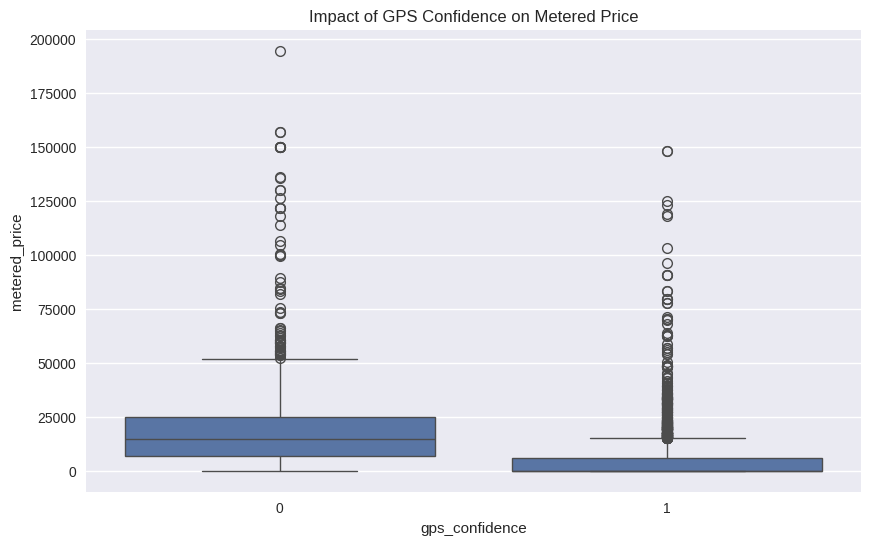

In [ ]:
# Route Analysis
# 1. GPS Confidence Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='gps_confidence', y='metered_price', data=df)
plt.title('Impact of GPS Confidence on Metered Price')
plt.show()

In [ ]:
# 2. Route Efficiency Analysis
df['distance_accuracy'] = (df['predicted_distance'] - df['distance']) / df['predicted_distance'] * 100
df['duration_accuracy'] = (df['predicted_duration'] - df['duration']) / df['predicted_duration'] * 100

print("\
Route Prediction Accuracy Statistics:")
print("\
Distance Prediction Accuracy (%):")
print(df['distance_accuracy'].describe())
print("\
Duration Prediction Accuracy (%):")
print(df['duration_accuracy'].describe())


Route Prediction Accuracy Statistics:
Distance Prediction Accuracy (%):
count    4923.000000
mean            -inf
std              NaN
min             -inf
25%       -31.003788
50%        -2.899576
75%         6.005100
max       100.000000
Name: distance_accuracy, dtype: float64
Duration Prediction Accuracy (%):
count    4923.000000
mean            -inf
std              NaN
min             -inf
25%       -63.180828
50%       -16.225448
75%         9.615209
max       100.000000
Name: duration_accuracy, dtype: float64


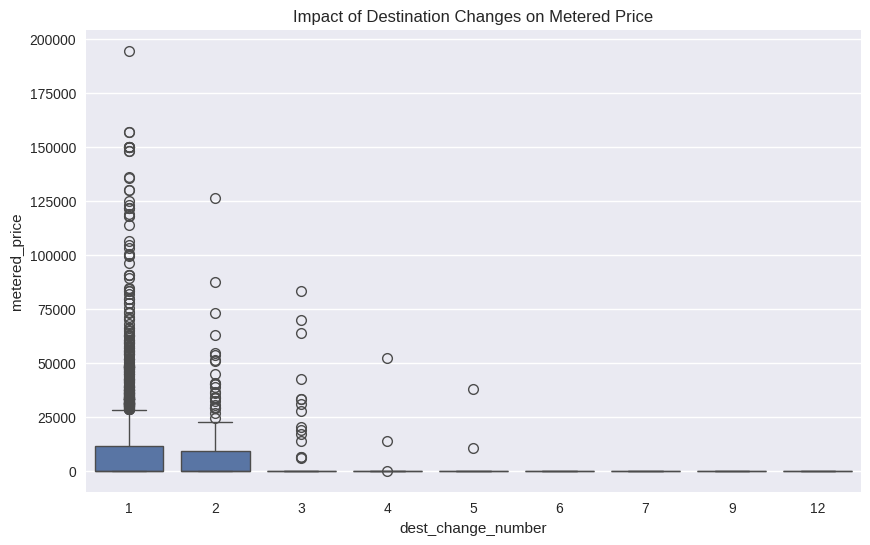

In [ ]:
# 3. Destination Changes Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='dest_change_number', y='metered_price', data=df)
plt.title('Impact of Destination Changes on Metered Price')
plt.show()

In [ ]:
# Calculate average price difference by destination changes
dest_changes_analysis = df.groupby('dest_change_number').agg({
    'metered_price': 'mean',
    'upfront_price': 'mean',
    'order_id_new': 'count'
}).reset_index()
dest_changes_analysis['price_difference'] = dest_changes_analysis['metered_price'] - dest_changes_analysis['upfront_price']
dest_changes_analysis = dest_changes_analysis.rename(columns={'order_id_new': 'number_of_rides'})

print("\
Destination Changes Impact Analysis:")
print(dest_changes_analysis)

Destination Changes Impact Analysis:
   dest_change_number  metered_price  upfront_price  number_of_rides  \
0                   1    8121.844227    3816.609519             4555   
1                   2    7477.306797   24254.221429              260   
2                   3    5326.508989    4933.324074               89   
3                   4    3312.003500    1343.533333               21   
4                   5    4054.575000       8.566667               12   
5                   6      28.840000            NaN                2   
6                   7      24.500000      15.750000                2   
7                   9      44.800000            NaN                1   
8                  12       5.110000            NaN                1   

   price_difference  
0       4305.234707  
1     -16776.914632  
2        393.184915  
3       1968.470167  
4       4046.008333  
5               NaN  
6          8.750000  
7               NaN  
8               NaN  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

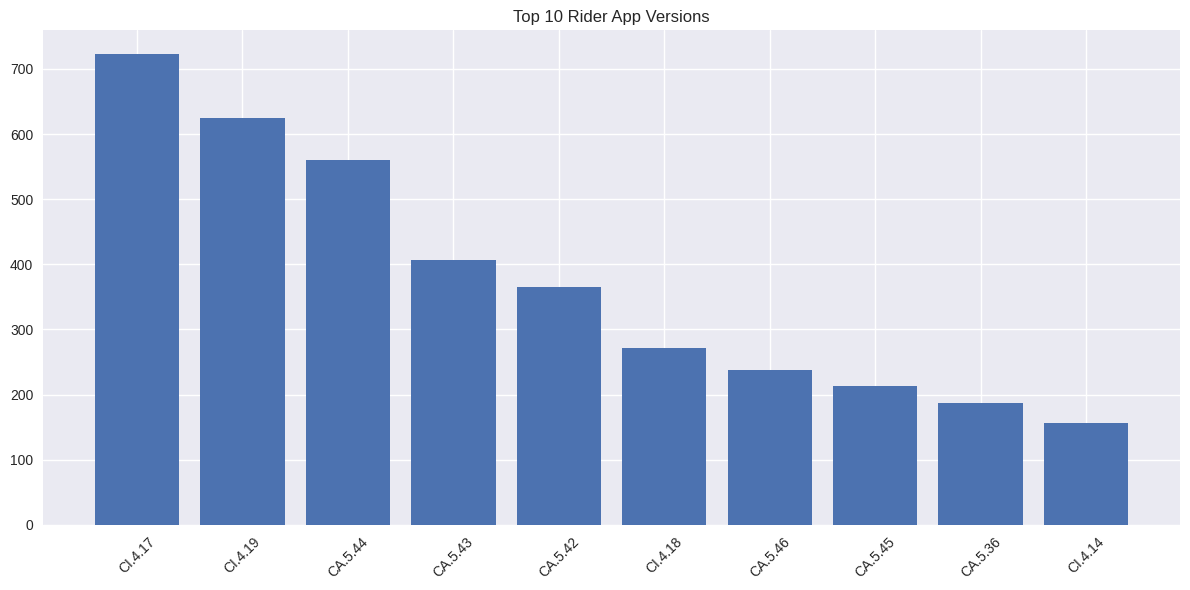

In [ ]:

# 1. App Version Analysis
plt.figure(figsize=(12, 6))
rider_app_counts = df['rider_app_version'].value_counts().head(10)
plt.bar(rider_app_counts.index, rider_app_counts.values)
plt.title('Top 10 Rider App Versions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate average metrics by app version
app_metrics = df.groupby('rider_app_version').agg({
    'metered_price': 'mean',
    'distance': 'mean',
    'duration': 'mean',
    'order_id_new': 'count'
}).reset_index()
app_metrics = app_metrics.rename(columns={'order_id_new': 'number_of_rides'})
app_metrics = app_metrics.sort_values('number_of_rides', ascending=False).head(10)

print("\
Top 10 Rider App Versions Performance Metrics:")
print(app_metrics)



Top 10 Rider App Versions Performance Metrics:
    rider_app_version  metered_price      distance     duration  \
107           CI.4.17    4931.986560   9433.679115  1426.976487   
109           CI.4.19    3901.889327   8600.642628  1337.310897   
60            CA.5.44    7913.989679  10452.944643  1616.898214   
59            CA.5.43    6721.786182   9453.711823  1449.748768   
58            CA.5.42   12060.620630  10868.978082  1701.158904   
108           CI.4.18    5038.074963  10030.073529  1369.665441   
62            CA.5.46    6421.654412   9660.983193  1383.344538   
61            CA.5.45    6374.508122   9023.061033  1520.652582   
54            CA.5.36   14139.126791  10718.304813  1872.122995   
104           CI.4.14    8753.335449   8541.307692  1395.717949   

     number_of_rides  
107              723  
109              624  
60               560  
59               406  
58               365  
108              272  
62               238  
61               213  
54      

In [ ]:
# 2. Device Analysis
device_metrics = df.groupby('device_name').agg({
    'metered_price': 'mean',
    'distance': 'mean',
    'duration': 'mean',
    'order_id_new': 'count'
}).reset_index()
device_metrics = device_metrics.rename(columns={'order_id_new': 'number_of_rides'})
device_metrics = device_metrics.sort_values('number_of_rides', ascending=False).head(10)

print("\
Top 10 Devices Performance Metrics:")
print(device_metrics)

Top 10 Devices Performance Metrics:
                        device_name  metered_price      distance     duration  \
386  TECNO MOBILE LIMITED TECNO B1p   20811.451944  14144.888889  1929.759259   
32             HMD Global Nokia 2.2   14888.819694   9848.346939  2756.622449   
492                       iPhone8,1    2227.114607   8861.494505  1170.384615   
376                        TECNO F3    9839.791512   8340.500000  1757.686047   
93                  HUAWEI MAR-LX1A       8.461111  10238.068493  1147.931507   
232               Samsung SM-A505FN     363.977971   7645.492754   928.695652   
396  TECNO MOBILE LIMITED TECNO KA7   14172.104925   9012.462687  1876.582090   
236                Samsung SM-A520F     804.599048   6717.285714  1082.698413   
495                       iPhone9,3     524.266290   8941.822581   932.612903   
294                Samsung SM-G960F       8.332787   8523.868852  1017.344262   

     number_of_rides  
386              108  
32                98  
492

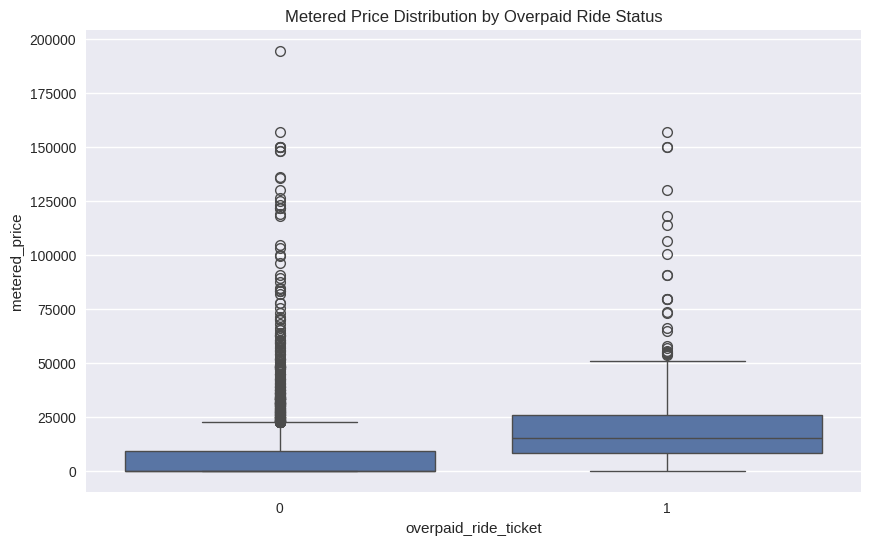

Fraud Analysis Statistics:
  overpaid_ride_ticket metered_price        fraud_score
                                mean count         mean
0                    0   6988.139562  4586  -671.225658
1                    1  21747.377329   337 -1033.647059


In [ ]:
# 3. Fraud Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='overpaid_ride_ticket', y='metered_price', data=df)
plt.title('Metered Price Distribution by Overpaid Ride Status')
plt.show()

# Calculate fraud statistics
fraud_stats = df.groupby('overpaid_ride_ticket').agg({
    'metered_price': ['mean', 'count'],
    'fraud_score': 'mean'
}).reset_index()

print("\
Fraud Analysis Statistics:")
print(fraud_stats)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Calculate price difference and percentage
df['price_difference'] = df['metered_price'] - df['upfront_price']
df['price_difference_percentage'] = (df['price_difference'] / df['upfront_price']) * 100


In [ ]:

# Create deviation category
df['significant_deviation'] = df['price_difference_percentage'].abs() > 20

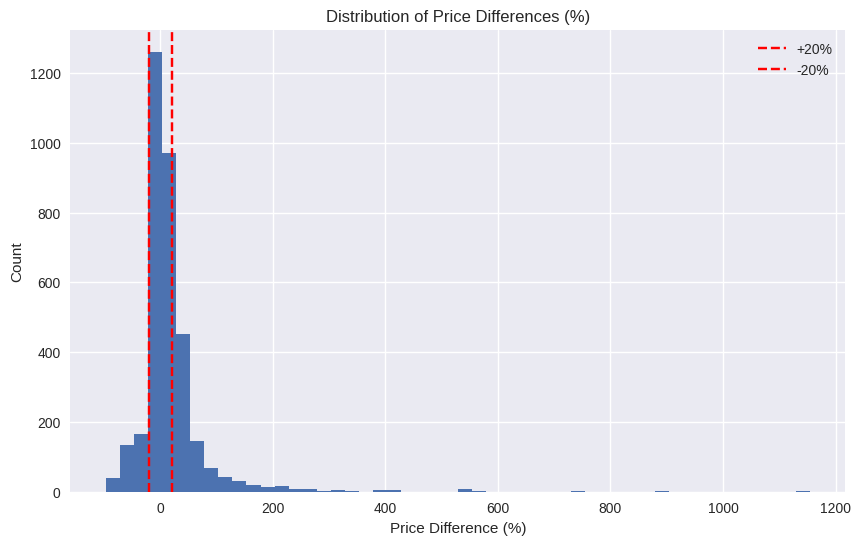

In [ ]:
# 1. Overall pricing accuracy analysis
plt.figure(figsize=(10, 6))
plt.hist(df['price_difference_percentage'].dropna(), bins=50)
plt.title('Distribution of Price Differences (%)')
plt.xlabel('Price Difference (%)')
plt.ylabel('Count')
plt.axvline(x=20, color='r', linestyle='--', label='+20%')
plt.axvline(x=-20, color='r', linestyle='--', label='-20%')
plt.legend()
plt.show()

In [ ]:
# Summary statistics
print("Pricing Accuracy Analysis:")
print("\
Price Difference Statistics:")
print(df['price_difference'].describe())
print("\
Percentage of Rides with >20% Deviation:")
print(df['significant_deviation'].mean() * 100, "% of rides")

Pricing Accuracy Analysis:
Price Difference Statistics:
count      3409.000000
mean        839.204362
std       17010.080750
min     -581317.540000
25%          -0.300000
50%           0.300000
75%           2.120000
max      178983.520000
Name: price_difference, dtype: float64
Percentage of Rides with >20% Deviation:
31.620473396722637 % of rides


In [ ]:
# 2. Analysis by GPS confidence
gps_accuracy = df.groupby('gps_confidence').agg({
    'significant_deviation': ['mean', 'count'],
    'price_difference_percentage': ['mean', 'std']
}).round(2)

print("\
GPS Confidence Impact on Pricing Accuracy:")
print(gps_accuracy)

GPS Confidence Impact on Pricing Accuracy:
               significant_deviation       price_difference_percentage        
                                mean count                        mean     std
gps_confidence                                                                
0                               0.26   985                       73.93  145.01
1                               0.33  3958                       11.88   47.08


In [ ]:
# 3. Analysis by prediction price type
prediction_type_analysis = df.groupby('prediction_price_type').agg({
    'significant_deviation': ['mean', 'count'],
    'price_difference_percentage': ['mean', 'std']
}).round(2)

print("\
Prediction Type Impact on Pricing Accuracy:")
print(prediction_type_analysis)

Prediction Type Impact on Pricing Accuracy:
                            significant_deviation        \
                                             mean count   
prediction_price_type                                     
prediction                                   0.00  1279   
upfront                                      0.46  3432   
upfront_destination_changed                  0.00   208   
upfront_waypoint_changed                     0.00     4   

                            price_difference_percentage        
                                                   mean   std  
prediction_price_type                                          
prediction                                          NaN   NaN  
upfront                                           18.65  68.1  
upfront_destination_changed                         NaN   NaN  
upfront_waypoint_changed                            NaN   NaN  


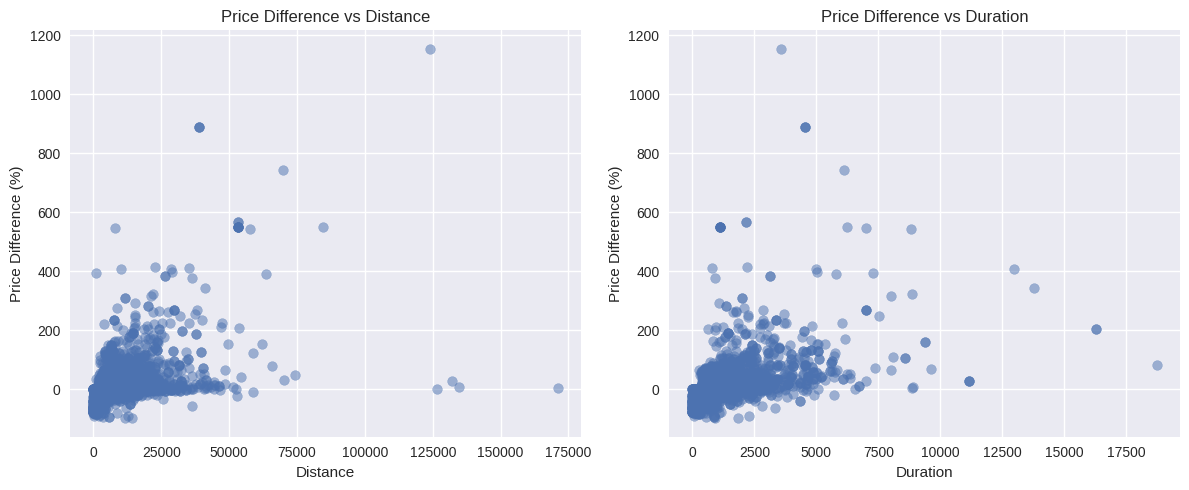

In [ ]:
# 4. Correlation with distance and duration
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['distance'], df['price_difference_percentage'], alpha=0.5)
plt.title('Price Difference vs Distance')
plt.xlabel('Distance')
plt.ylabel('Price Difference (%)')

plt.subplot(1, 2, 2)
plt.scatter(df['duration'], df['price_difference_percentage'], alpha=0.5)
plt.title('Price Difference vs Duration')
plt.xlabel('Duration')
plt.ylabel('Price Difference (%)')
plt.tight_layout()
plt.show()

In [ ]:
# Deep Dive Analysis: Destination Changes and Ride Characteristics

# Analyze impact of destination changes on pricing accuracy
destination_change_analysis = df.groupby('dest_change_number').agg({
    'significant_deviation': ['mean', 'count'],
    'price_difference_percentage': ['mean', 'std']
}).round(2)

print("\
Destination Change Impact on Pricing Accuracy:")
print(destination_change_analysis)

Destination Change Impact on Pricing Accuracy:
                   significant_deviation       price_difference_percentage  \
                                    mean count                        mean   
dest_change_number                                                           
1                                   0.33  4555                       17.86   
2                                   0.11   260                       13.02   
3                                   0.45    89                       56.17   
4                                   0.14    21                      156.29   
5                                   0.00    12                        2.79   
6                                   0.00     2                         NaN   
7                                   1.00     2                       78.22   
9                                   0.00     1                         NaN   
12                                  0.00     1                         NaN   

                

In [ ]:
# Correlation analysis for ride characteristics
correlation_matrix = df[['distance', 'duration', 'gps_confidence', 'price_difference_percentage']].corr()

print("\
Correlation Matrix for Ride Characteristics:")
print(correlation_matrix)

Correlation Matrix for Ride Characteristics:
                             distance  duration  gps_confidence  \
distance                     1.000000  0.522302       -0.211084   
duration                     0.522302  1.000000       -0.329022   
gps_confidence              -0.211084 -0.329022        1.000000   
price_difference_percentage  0.469706  0.445946       -0.284124   

                             price_difference_percentage  
distance                                        0.469706  
duration                                        0.445946  
gps_confidence                                 -0.284124  
price_difference_percentage                     1.000000  


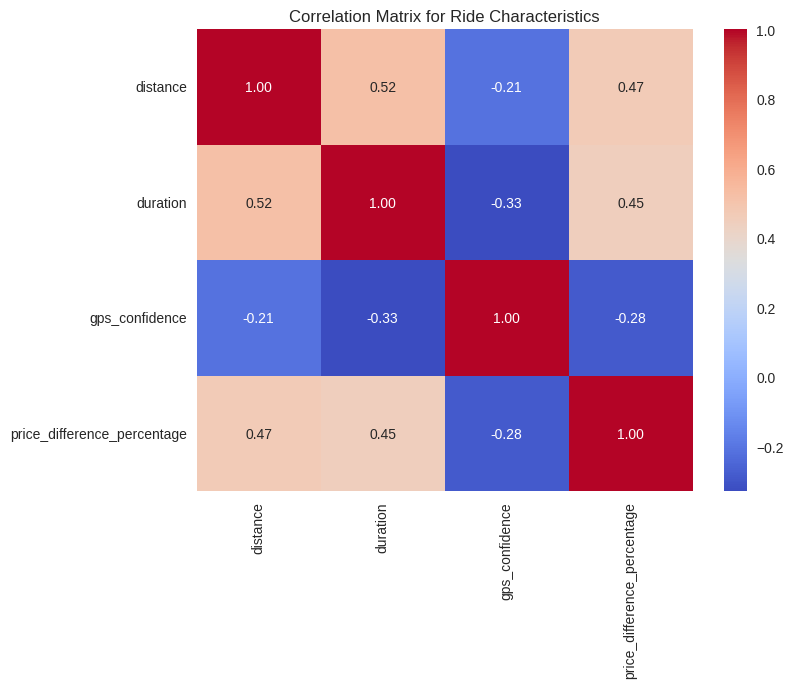

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Ride Characteristics')
plt.show()


In [ ]:
# Business Recommendations
recommendations = """
1. Improve GPS Accuracy:
   - Focus on rides with low GPS confidence as they show higher pricing deviations.
   - Invest in better GPS tracking and error correction algorithms.

2. Handle Destination Changes Better:
   - Rides with destination changes show significant pricing deviations.
   - Implement dynamic pricing adjustments for destination changes in real-time.

3. Optimize Prediction Algorithms:
   - Enhance prediction models for distance and duration to reduce pricing errors.
   - Focus on rides with long distances and durations as they show higher deviations.

4. Monitor and Address Outliers:
   - Identify and investigate rides with extreme pricing deviations to improve accuracy.

5. Improve Communication with Customers:
   - Notify customers about potential pricing changes due to destination changes or other factors.
"""

print("\
Business Recommendations:")
print(recommendations)

Business Recommendations:

1. Improve GPS Accuracy:
   - Focus on rides with low GPS confidence as they show higher pricing deviations.
   - Invest in better GPS tracking and error correction algorithms.

2. Handle Destination Changes Better:
   - Rides with destination changes show significant pricing deviations.
   - Implement dynamic pricing adjustments for destination changes in real-time.

3. Optimize Prediction Algorithms:
   - Enhance prediction models for distance and duration to reduce pricing errors.
   - Focus on rides with long distances and durations as they show higher deviations.

4. Monitor and Address Outliers:
   - Identify and investigate rides with extreme pricing deviations to improve accuracy.

5. Improve Communication with Customers:
   - Notify customers about potential pricing changes due to destination changes or other factors.

